<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/6.%20Python%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FLinear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6. Linear Regression using sklearn**

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#Bostonの住宅価格データ
標本数506、よく練習に使われるデータ

In [ ]:
boston = load_boston()
np.random.seed(1234)

In [ ]:
# 説明変数：13項目のうち1つだけ使う
x = boston.data[:, 5]
# 目的変数：住宅価格のデータを使う
y = boston.target

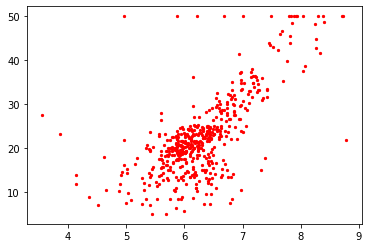

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=5, c="red")

#最急降下法を行う
Cost: J = (sum((θ×X - y)^2)/2m <br>
Cost function: J(θ) =1/2m * Σ(hθ(x(i)^-y(i)))^2 <br>

最急降下法：(Cost function J(θ)の微分を減算する）<br>
θj = θj - α * 1/m * Σ((h(x(i)-y(i))*Xj(i) )

In [ ]:
# w0の項を追加するためにxに小細工をする
X = np.array([[1, v] for v in x])
# ランダムな値をw0, w1の初期値に設定する
theta = np.random.random(len(X[0]))
# ちょっと変えるための度合いを決める
alpha = 0.01
# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
theta_100 = []
theta_1000 = []
theta_10000 = []
for i in range(100000):
    # 予測値y_predを計算する。
    y_pred = np.dot(X, theta)  # 式２－１
    # 損失関数の微分を計算する
    dw = np.dot((y - y_pred), X) / len(X)  # 式２－５
    # wをちょっとだけ動かす
    # print(i, 'w =', w)
    theta += alpha * dw  # 式２－６
    if i == 100-1:
        # listはnp.copyしないとコピー元と同期してしまうので注意！
        theta_100 = np.copy(theta)
    elif i == 1000-1:
        theta_1000 = np.copy(theta)
    elif i == 10000-1:
        theta_10000 = np.copy(theta)
    elif i == 100000-1:
        theta_100000 = np.copy(theta)

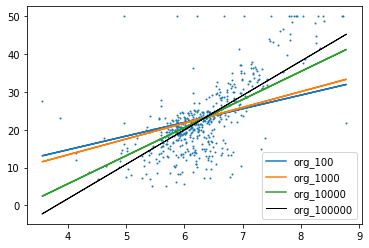

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
 
# ----------------計算式の結果-------------------
plt.plot(x, np.dot(X, theta_100), label='org_100')
plt.plot(x, np.dot(X, theta_1000), label='org_1000')
plt.plot(x, np.dot(X, theta_10000), label='org_10000')
plt.plot(x, np.dot(X, theta_100000), c='black', linewidth=1.0, label='org_100000')
 

plt.legend()
plt.show()

In [ ]:
# ######### skleanのツールLinearRegressionを使って回帰 ###########
# ものすごく簡単...
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
pred = lr.predict(X)

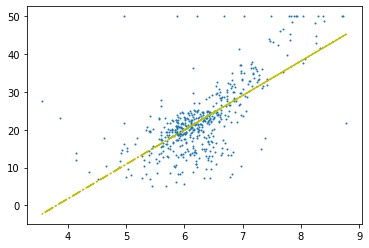

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
 